# 5. Machine Learning
### https://jakevdp.github.io/PythonDataScienceHandbook/ 

## Introducing Scikit-Learn
-  a package that provides efficient versions of a large number of common algorithms

## Data Representation in Scikit-Learn
### Data as Table
- rows of the matrix: samples
- number of rows: n_samples
- columns of the matrix: features
- number of columns: n_features

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

/home/mabeigier/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/mabeigier/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris.shape

(150, 5)

#### Features Matrix
- stored in a variable named X (convension)
- shape: [n_samples, n_features] 
- samples (i.e., rows) always refer to the individual objects described by the dataset
- features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner (or boolean)
#### Target Array (label)
- stored in a variable named y (convension)
- shape:usually one dimensional (length n_samples), generally contained in a NumPy array or Pandas Series
- continuous numerical values, or discrete classes/labels
- it is the quantity we want to predict from the data (dependent variable)

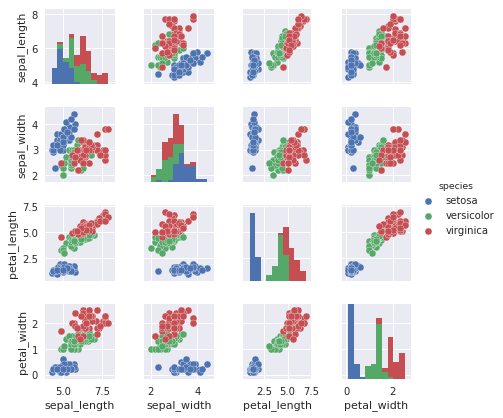

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris.species
y_iris.shape

(150,)

## Scikit-Learn's Estimator API
- **consistency**: all objects share a common interface drawn from a limited set of methods, with consistent documentation
- **inspection**: all specified parameter values are exposed as public attributes
- **Limited object hierarchy**: only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings
- **composition**: many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible
- **sensible defaults**: when models require user-specified parameters, the library defines an appropriate default value
### Basics of the API
- choose a class of model by importing the appropriate estimator class from Scikit-Learn
- choose model hyperparameters by instantiating this class with desired values
- Arrange data into a features matrix and target vector following the discussion above
- fit the model to your data by calling the fit() method of the model instance
- apply the Model to new data:
    - for supervised learning, often we predict labels for unknown data using the predict() method
    - for unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method

### Supervised Learning Example: Simple Linear Regression

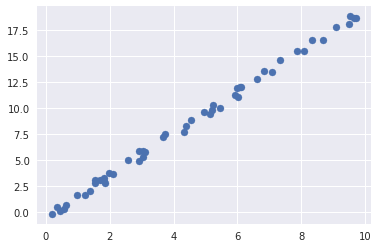

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
plt.scatter(x, y);

In [7]:
x.shape

(50,)

#### 1. Choose a Class of Model:
- Scikit-Learn: every class of model is represented by a Python class

In [20]:
from sklearn.linear_model import LinearRegression 

#### 2. Choose Model Hyperparameters
- **hyperparameters** (parameters that must be set before the model is fit to data) are chosen by passing values at model instantiation

In [21]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 3. Arrange Data into a Features Matrix and Target Vector

In [22]:
# x: [n_samples, n_features]
# here, reshaping of the one-dimensional array
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the Model to Your Data

In [23]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# slope
model.coef_

array([2.00660766])

In [25]:
# y intercept
model.intercept_

-0.5350275750800026

#### 5. Predict Labels for Unknown Data

In [33]:
Xfit = np.linspace(-1, 11)

In [34]:
Xfit.shape

(50,)

In [35]:
Xfit = Xfit[:, np.newaxis]
yfit = model.predict(Xfit)

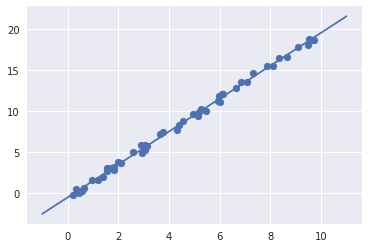

In [28]:
plt.scatter(X, y)
plt.plot(Xfit, yfit);

### Supervised Learning Example: Iris Classification
- Gaussian naive Bayes: assums each class is drawn from an axis-aligned Gaussian distribution
- train_test_split: split the data into a training set and a testing set

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [30]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                # 3. fit model to data
y_model = model.predict(X_test)            # 4. predict on new data  

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9736842105263158

### Unsupervised Learning Example: Iris Dimensionality
- reducing the dimensionality of the Iris data so as to more easily visualize it

In [36]:
from sklearn.decomposition import PCA      # 1. choose model calss
model = PCA(n_components=2)                # 2. instantiate model with hyperparameters
model.fit(X_iris)                          # 3. fit model to data, notice y is not specified!
X_2D = model.transform(X_iris)             # 4. transform the data to two dimensions 

/home/mabeigier/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [38]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

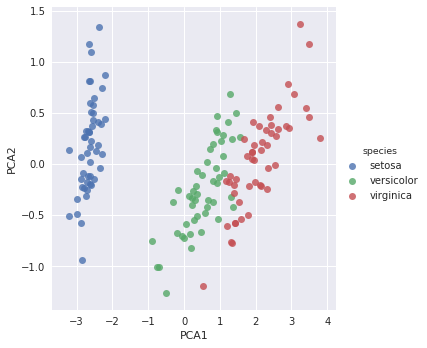

In [41]:
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False);

### Unsupervised Learning: Iris Clustering
- Gaussian mixture model (GMM)attempts to model the data as a collection of Gaussian blobs
- it assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters
- mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians

In [42]:
from sklearn.mixture import GMM
model = GMM(n_components=3,                          # 1. choose model calss
            covariance_type='full')                  # 2. instantiate the model with hyperparameters
model.fit(X_iris)                                    # 3. fit model to data, notice y is not specified!
y_gmm = model.predict(X_iris)                        # 4. determine cluster labels

/home/mabeigier/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/mabeigier/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/mabeigier/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mabeigier/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_m

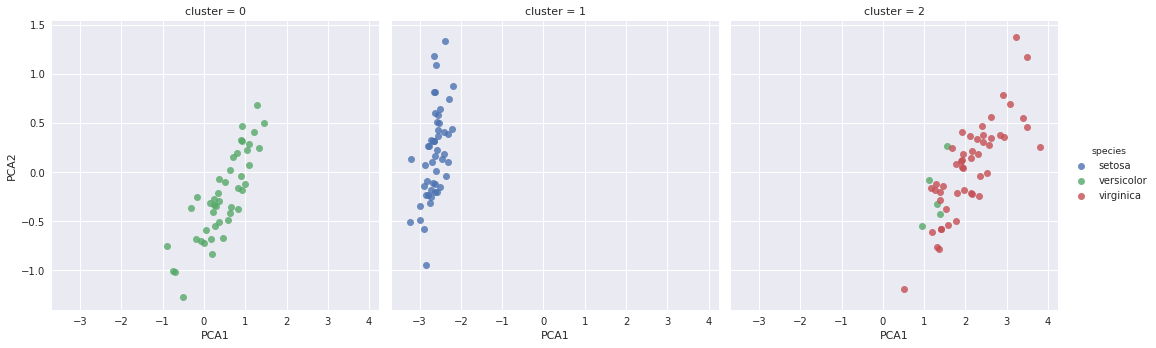

In [43]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, col='cluster', fit_reg=False);

## Application: Exploring Hand-written Digits
### Loading and Visualizing the Digits Data

In [54]:
from sklearn.datasets import load_digits
digits = load_digits()
# 1,797 samples each consisting of an 8 × 8 grid of pixels
digits.images.shape

(1797, 8, 8)

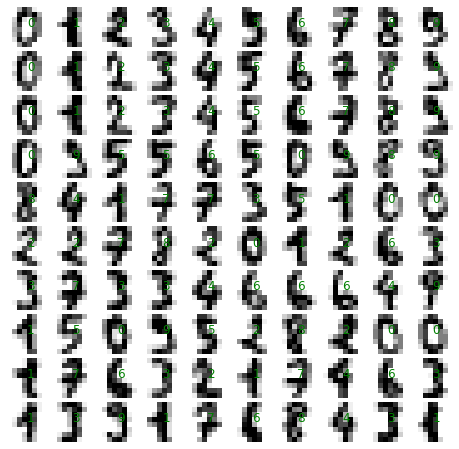

In [56]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.5, 0.5, str(digits.target[i]),
           transform=ax.transAxes, color='green')

#### To work with this data within Scikit-Learn, we need a 2D, [n_samples, n_features] representation: treat each pixel in the image as a feature (by flattening out the pixel arrays to have a length-64 array of pixel values representing each digit). Additionally, we need the target array, which gives the previously determined label for each digit.

In [57]:
X = digits.data
X.shape   # 64 dimensions

(1797, 64)

In [58]:
y = digits.target
y.shape

(1797,)

### Unsupervised Learning: Dimensionality Reduction 
-  to visualize our points within the 64-D parameter space reduce the dimensions to 2, using an unsupervised method

In [59]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)                                                    
iso.fit(X)                                        
data_projected = iso.transform(X)  
data_projected.shape      # 2D data

(1797, 2)

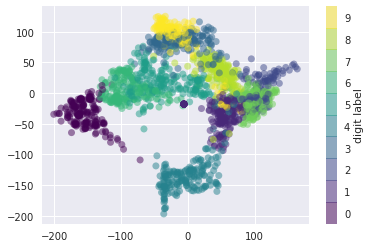

In [63]:
# plot the data
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on Digits

In [65]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [68]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8333333333333334

#### Confusion matrix to evaluate the accuracy of a classification: confusion matrix C is such that Ci, j is equal to the number of observations known to be in group i but predicted to be in group j. In binary classification, the count of true negatives is C0,0, false negatives is C1,0, true positives is C1,1 and false positives is C0,1.

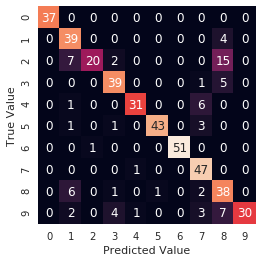

In [70]:
# sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# square: if True, set the Axes aspect to “equal” so each cell will be square-shaped.
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value');

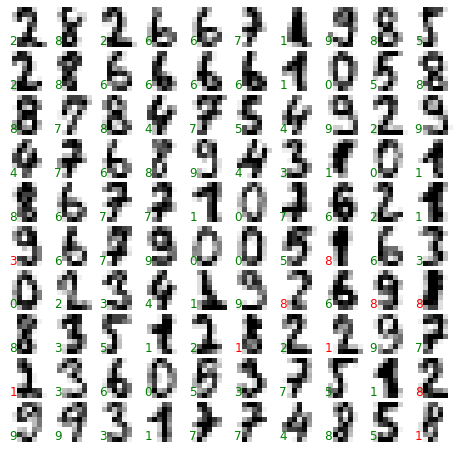

In [72]:
# mis-labeled points
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = X_test.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_pred[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_pred[i]) else 'red')